In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
Dataset1 = pd.read_csv("/content/drive/MyDrive/MyPersonalDataset/heart.csv")
Dataset1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
Dataset1.shape

(1025, 14)

In [6]:
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
Dataset1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

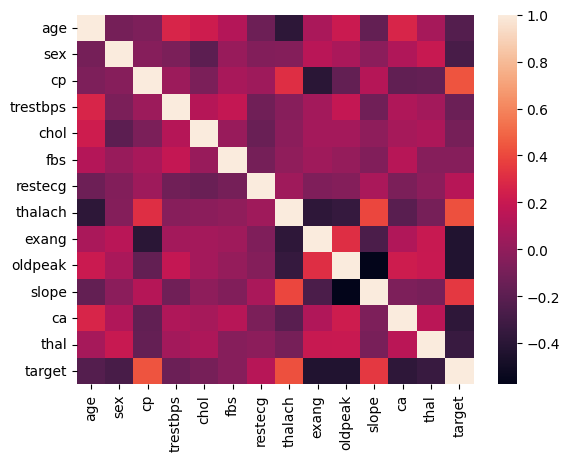

In [8]:
sns.heatmap(Dataset1.corr())

In [9]:
# splitting the dataset
# input data
X = Dataset1.drop(columns = ['target'])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [10]:
# output data
y = Dataset1[['target']]
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [11]:
# train test splitting
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 13)
(257, 13)
(768, 1)
(257, 1)


In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [14]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [15]:
X_train_sc

array([[ 0.28878893,  0.65384195, -0.92854686, ...,  0.98910516,
        -0.72955774,  1.11125919],
       [ 0.61272745,  0.65384195, -0.92854686, ..., -0.6551216 ,
         0.223334  ,  1.11125919],
       [ 0.82868645,  0.65384195,  0.03513421, ...,  0.98910516,
        -0.72955774, -0.54591956],
       ...,
       [-0.35908809,  0.65384195, -0.92854686, ...,  0.98910516,
        -0.72955774,  1.11125919],
       [-1.22292412,  0.65384195, -0.92854686, ...,  0.98910516,
        -0.72955774,  1.11125919],
       [-0.25110859,  0.65384195, -0.92854686, ...,  0.98910516,
         0.223334  , -0.54591956]])

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [17]:
model1 = AdaBoostClassifier()
model1.fit(X_train_sc, y_train)

AdaBoostClassifier()

In [18]:
y_pred = model1.predict(X_test_sc)

In [19]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [20]:
y_test

,target
527,1
359,1
447,0
31,1
621,0
...,...
940,0
787,0
926,0
249,1


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(accuracy_score(y_test, y_pred))

0.8560311284046692


In [23]:
# now we will pass some customized parameter

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model2 = AdaBoostClassifier(estimator = LogisticRegression(), n_estimators = 100)

In [26]:
model2.fit(X_train_sc, y_train)

AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=100)

In [27]:
y_pred2 = model2.predict(X_test_sc)

In [28]:
y_pred2

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [29]:
print(accuracy_score(y_test, y_pred2))

0.7704280155642024


# One Hot Encoding

In [30]:
Dataset2 = pd.read_csv("/content/drive/MyDrive/MyPersonalDataset/tips.csv")
Dataset2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [32]:
Dataset3 = pd.get_dummies(Dataset2, columns = ['sex'])

In [33]:
Dataset3

,total_bill,tip,smoker,day,time,size,sex_Female,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,1,0
1,10.34,1.66,No,Sun,Dinner,3,0,1
2,21.01,3.50,No,Sun,Dinner,3,0,1
3,23.68,3.31,No,Sun,Dinner,2,0,1
4,24.59,3.61,No,Sun,Dinner,4,1,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0,1
240,27.18,2.00,Yes,Sat,Dinner,2,1,0
241,22.67,2.00,Yes,Sat,Dinner,2,0,1
242,17.82,1.75,No,Sat,Dinner,2,0,1


In [36]:
# now we will use the parameter called as drop_first = True
Dataset4 = pd.get_dummies(Dataset2, columns = ['sex'], drop_first=True)
Dataset4

,total_bill,tip,smoker,day,time,size,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,0
1,10.34,1.66,No,Sun,Dinner,3,1
2,21.01,3.50,No,Sun,Dinner,3,1
3,23.68,3.31,No,Sun,Dinner,2,1
4,24.59,3.61,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1
240,27.18,2.00,Yes,Sat,Dinner,2,0
241,22.67,2.00,Yes,Sat,Dinner,2,1
242,17.82,1.75,No,Sat,Dinner,2,1


# 43. Suport Vector Classifier

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 13)
(257, 13)
(768, 1)
(257, 1)


In [38]:
from sklearn.svm import SVC

In [39]:
model3 = SVC()
model3.fit(X_train_sc, y_train)

SVC()

In [40]:
y_pred3 = model3.predict(X_test_sc)
y_pred3

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [41]:
 # accuracy score
print(accuracy_score(y_test, y_pred3))

0.8949416342412452
